## Import packages and variables
First we import some visualization libraries. For ease of reading of the Jupyter Notebook, cleaning and feature engineering have been consolidated into june_gloom.py script, from which we import the prepared dataframes.

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import june_gloom
june_gloom.init()
june_gloom.noaa_clean()
june_gloom.feature_sst_anomaly()
from june_gloom import df_lax, df_enso_sst

Let's take a quick peek at our dataframe to make sure everthing loaded properly.

We can see the time format is correct (YYYY-MM-DD) and preview our columns. Note the 'FRSHTT' column; the NOAA data are encoded either '0' or '1' for each of the following events: "Fog, Rain, Snow, Hail, Thunder, Tornado" (GSOD_DESC.txt)

In [13]:
print(df_lax.head(3))
print('\n\n')
print(df_lax.tail(3))

    YEARMODA  TEMP  DEWP     SLP     STP  VISIB  WDSP  MXSPD   GUST   MAX  \
0 1973-01-01  58.6  12.9  1018.7  1015.1   25.9   8.7   14.0   28.9  66.9   
1 1973-01-02  54.7  27.3  1017.4  1013.8   19.1   5.6   10.1  999.9  64.0   
2 1973-01-03  53.3  42.4  1015.7  1012.1   22.1   7.1   18.1   22.9  59.0   

    MIN  PRCP   SNDP  FRSHTT  month  year  dummy  sst_anomaly  
0  52.0   0.0  999.9       0      1  1973      1          1.8  
1  45.0   0.0  999.9       0      1  1973      1          1.8  
2  48.0   0.0  999.9   10000      1  1973      1          1.8  



        YEARMODA  TEMP  DEWP     SLP     STP  VISIB  WDSP  MXSPD   GUST   MAX  \
16585 2018-05-30  62.5  56.0  1011.0   999.4    8.9   6.8   11.1  999.9  69.1   
16586 2018-05-31  64.6  55.4  1012.3  1000.8    9.2   8.1   13.0   18.1  70.0   
16587 2018-06-01  63.4  53.7  1014.4  1002.7    9.4   6.6   13.0  999.9  70.0   

        MIN  PRCP   SNDP  FRSHTT  month  year  dummy  sst_anomaly  
16585  60.1   0.0  999.9   10000      5

We have 16,588 days of data to play with. Woohoo!

In [16]:
df_lax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16588 entries, 0 to 16587
Data columns (total 18 columns):
YEARMODA       16588 non-null datetime64[ns]
TEMP           16588 non-null float64
DEWP           16588 non-null float64
SLP            16588 non-null float64
STP            16588 non-null float64
VISIB          16588 non-null float64
WDSP           16588 non-null float64
MXSPD          16588 non-null float64
GUST           16588 non-null float64
MAX            16588 non-null float64
MIN            16588 non-null float64
PRCP           16588 non-null float64
SNDP           16588 non-null float64
FRSHTT         16588 non-null int64
month          16588 non-null int64
year           16588 non-null int64
dummy          16588 non-null int64
sst_anomaly    16556 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(4)
memory usage: 2.3 MB


As we can see below, the overwhelming majority of weather events observed at Los Angeles National Airport between 1973 and 2018 was 'Sun'. Sanity, check. The next most common was 'Fog', followed by 'Rain'.

In [17]:
print(df_lax['FRSHTT'].value_counts())

0         10009
100000     4251
10000      1169
110000      958
10010       106
110010       61
10            8
10110         4
10100         4
110100        3
1             3
100010        2
110110        2
11000         2
111100        1
1000          1
111000        1
11110         1
110011        1
11100         1
Name: FRSHTT, dtype: int64


Lets slice up the dataframe according to weather events for ease:

In [18]:
df_lax_fog = df_lax[df_lax['FRSHTT']==100000]
df_lax_rain = df_lax[df_lax['FRSHTT']==10000]
df_lax_sun = df_lax[df_lax['FRSHTT']==0]

## Exploratory data analysis
Just to get a few basic ideas of what we're working with, we can plot a few histograms to see what's going on.

In [22]:
df_lax_

YEARMODA       1169
TEMP           1169
DEWP           1169
SLP            1169
STP            1169
VISIB          1169
WDSP           1169
MXSPD          1169
GUST           1169
MAX            1169
MIN            1169
PRCP           1169
SNDP           1169
FRSHTT         1169
month          1169
year           1169
dummy          1169
sst_anomaly    1164
dtype: int64

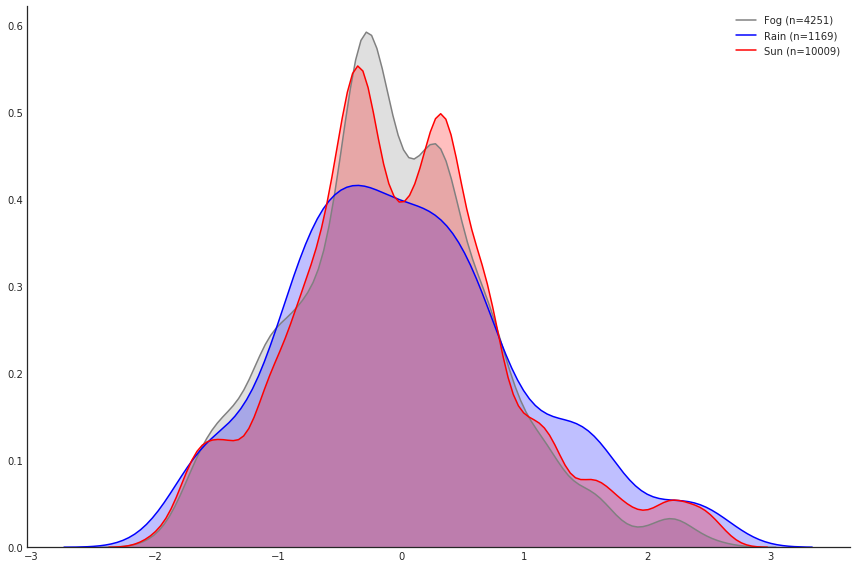

In [4]:
sns.set_style('white')
plt.figure(figsize=(12,8))

sns.kdeplot(df_lax_fog['sst_anomaly'].dropna(), color='grey', shade=True)
sns.kdeplot(df_lax_rain['sst_anomaly'].dropna(), color='blue', shade=True)
sns.kdeplot(df_lax_sun['sst_anomaly'].dropna(), color='red', shade=True)

sns.despine()
plt.tight_layout()
plt.legend(['Fog (n=4251)', 'Rain (n=1169)', 'Sun (n=10009)']);

In [5]:
df_lax_rain[df_lax_rain['PRCP']>1.0].head()

,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,month,year,dummy,sst_anomaly
3,1973-01-04,51.5,36.5,1013.6,1009.9,24.6,6.2,12.0,999.9,57.0,45.0,3.15,999.9,10000,1,1973,1,1.8
87,1973-03-29,57.1,36.8,1014.4,1010.8,31.5,11.4,20.0,25.8,63.0,50.0,5.12,999.9,10000,3,1973,1,0.5
117,1973-04-28,57.1,50.9,1013.1,1009.4,6.5,6.3,10.1,999.9,60.1,55.9,8.27,999.9,10000,4,1973,1,-0.1
702,1974-12-04,58.8,57.3,1012.3,1008.7,7.9,9.7,15.0,28.0,62.1,55.0,2.28,999.9,10000,12,1974,1,-0.6
1588,1977-05-08,57.3,51.7,1011.6,1007.9,18.4,9.3,20.0,28.9,62.1,51.1,1.57,999.9,10000,5,1977,1,0.2


TypeError: object of type 'int' has no len()

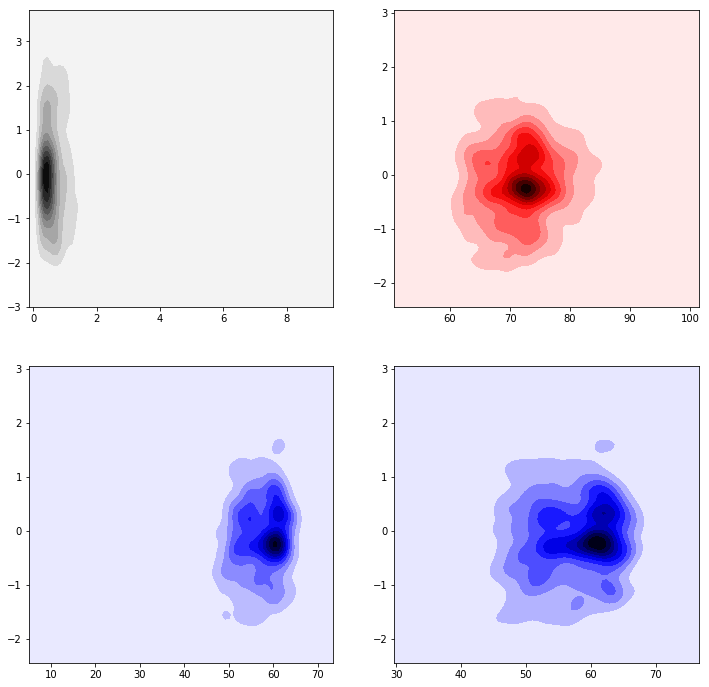

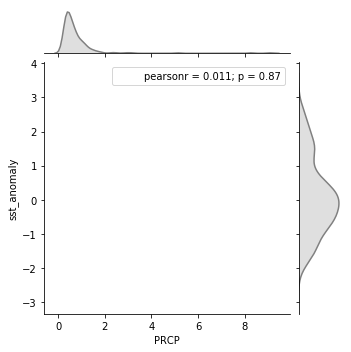

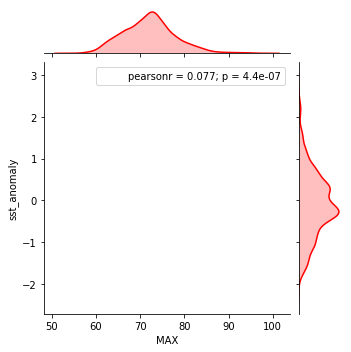

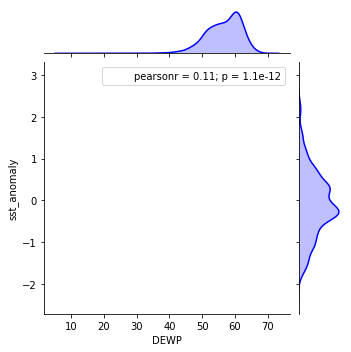

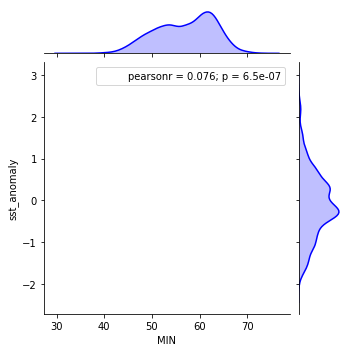

In [21]:
sns.axes_style('white')

fig, ax = plt.subplots(figsize=(12, 12), ncols=2, nrows=2)

sns.jointplot('PRCP', 'sst_anomaly', data=df_lax_rain[df_lax_rain['PRCP']>0.25], kind='kde', 
              size=5, color='grey', ax=ax[0][0]);
sns.jointplot('MAX', 'sst_anomaly', data=df_lax_fog, kind='kde', size=5, color='red', 
              ax=ax[0][1]);
sns.jointplot('DEWP', 'sst_anomaly', data=df_lax_fog, kind='kde', size=5, color='blue', 
              ax=ax[1][0]);
sns.jointplot('MIN', 'sst_anomaly', data=df_lax_fog, kind='kde', size=5, color='blue', 
              ax=ax[1][1]);

ax[0][1].axis(40, 100)

ax[0][0].set_title("Precip vs SST");
ax[0][1].set_title("T Max vs SST");
ax[1][0].set_title("Dew Pt vs SST");
ax[1][1].set_title("T Min vs SST");

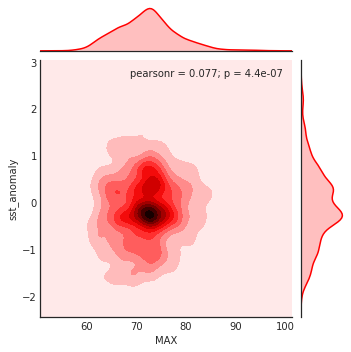

In [7]:
# Must use 3 month running averages to compare with SST data (also 3 month running avgs)

with sns.axes_style('white'):
    sns.jointplot('MAX', 'sst_anomaly', data=df_lax_fog, kind='kde', size=5, 
                  color='red');

In [ ]:
with sns.axes_style('white'):
    sns.jointplot('MIN', 'sst_anomaly', data=df_lax_fog, kind='kde', size=5, 
                  color='blue');

In [ ]:
sns.set_style('white')
plt.figure(figsize=(12,8))

sns.distplot(df_lax_fog['sst_anomaly'].dropna(), bins=40, color='grey')
plt.title("Distribution of SST Anomaly on 4,249 Foggy Days (no rain) from 1973-2018", 
          fontsize=20)

plt.axvline(0, color="k", linestyle="--");

sns.despine()
plt.tight_layout()
plt.tight_layout()

In [ ]:
sns.set_style('white')
plt.figure(figsize=(12,8))

sns.distplot(df_lax_sun['sst_anomaly'].dropna(), bins=40, color='r')
plt.title("Distribution of SST Anomaly on 4,249 Foggy Days (no rain) from 1973-2018", 
          fontsize=20)

plt.axvline(0, color="k", linestyle="--");

sns.despine()
plt.tight_layout()
plt.tight_layout()

In [ ]:
df_lax_fog.pivot_table(index='year', columns='month', aggfunc='mean')['sst_anomaly'].head()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.heatmap(df_lax_fog.pivot_table(index='year', columns='month', aggfunc='sum')['dummy'], 
           cmap='Blues', annot=df_enso_sst.loc[1973: 2018])

plt.tight_layout()
plt.title('Fog Days Monthly Average', fontsize=20);

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.heatmap(df_enso_sst, cmap='coolwarm')

plt.tight_layout()
plt.title('SST Anomaly', fontsize=20);

In [ ]:
# SST Anomaly key, must pass on to weak el nino, strong el nino, etc. Or just find new data.
# df_enso_sst.columns = list(range(1, 13))